# Using .backward() and Interpreting Gradients


In [ ]:
!pip install torchviz graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## Step 1: Imports


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchviz import make_dot # Ensure torchviz and graphviz are installed

## Step 2: Calculating Gradients with .backward()


In [ ]:
# Create a tensor and set requires_grad=True to track computation with it
x_calc = torch.tensor(2.0, requires_grad=True)

# Define a simple polynomial function
y_calc = x_calc**2 + 2*x_calc + 1
print(f"For x = {x_calc.item()}, y = {y_calc.item()}")

# Compute gradients
# y_calc is a scalar, so we can call .backward() directly
y_calc.backward()

# The gradient dy/dx is now stored in x_calc.grad
print(f"Calculated gradient dy/dx at x = {x_calc.item()}: {x_calc.grad}")

For x = 2.0, y = 9.0
Calculated gradient dy/dx at x = 2.0: 6.0


## Step 3: Managing Gradients


### 3.1 Zeroing Gradients with .grad.zero_()


In [ ]:
x_manage = torch.tensor(3.0, requires_grad=True)

# First calculation
y1_manage = x_manage**2  # dy1/dx = 2x. At x=3, gradient is 6
y1_manage.backward()
print(f"Gradient after first backward pass (y=x^2, x=3): {x_manage.grad}") # Expected: 6.0

# Second calculation WITHOUT zeroing gradients
# Gradients will accumulate
y2_manage = x_manage**3  # dy2/dx = 3x^2. At x=3, gradient is 27
y2_manage.backward()
print(f"Gradient after second backward pass (accumulated, y=x^3, x=3): {x_manage.grad}") # Expected: 6.0 + 27.0 = 33.0

# Zero the gradients before the next calculation
x_manage.grad.zero_()
print(f"Gradient after zeroing: {x_manage.grad}") # Expected: 0.0

# Third calculation AFTER zeroing gradients
y3_manage = x_manage * 5 # dy3/dx = 5
y3_manage.backward()
print(f"Gradient after third backward pass (fresh, y=5x, x=3): {x_manage.grad}") # Expected: 5.0

Gradient after first backward pass (y=x^2, x=3): 6.0
Gradient after second backward pass (accumulated, y=x^3, x=3): 33.0
Gradient after zeroing: 0.0
Gradient after third backward pass (fresh, y=5x, x=3): 5.0


### 3.2 Disabling Gradient Tracking with torch.no_grad()


In [ ]:
x_no_grad = torch.tensor(4.0, requires_grad=True)
print(f"x_no_grad: {x_no_grad}, requires_grad: {x_no_grad.requires_grad}")

# Operations within torch.no_grad() context
with torch.no_grad():
    y_no_grad = x_no_grad**2 + 2*x_no_grad + 1
    print(f"Inside torch.no_grad():")
    print(f"  y_no_grad = {y_no_grad}, y_no_grad.requires_grad: {y_no_grad.requires_grad}")
    # Any tensor computed inside this block will have requires_grad=False


# x_no_grad.grad is still None (or its previous value if backward() was called before)
# because y_no_grad did not participate in a gradient-tracked computation graph
# that led to a .backward() call.
print(f"x_no_grad.grad after no_grad block: {x_no_grad.grad}") # Expected: None

# Gradient tracking is re-enabled outside the 'with torch.no_grad():' block
# for tensors defined with requires_grad=True
z_with_grad = x_no_grad**3  # z = x^3, dz/dx = 3x^2. At x=4, dz/dx = 3*(4^2) = 48
print(f"\nOutside torch.no_grad():")
print(f"  z_with_grad = {z_with_grad}, z_with_grad.requires_grad: {z_with_grad.requires_grad}")

# We need to ensure x_no_grad.grad is zero if it had prior values from other examples
if x_no_grad.grad is not None:
    x_no_grad.grad.zero_()

z_with_grad.backward()
print(f"  x_no_grad.grad after z_with_grad.backward(): {x_no_grad.grad}") # Expected: 48.0

x_no_grad: 4.0, requires_grad: True
Inside torch.no_grad():
  y_no_grad = 25.0, y_no_grad.requires_grad: False
x_no_grad.grad after no_grad block: None

Outside torch.no_grad():
  z_with_grad = 64.0, z_with_grad.requires_grad: True
  x_no_grad.grad after z_with_grad.backward(): 48.0


## Step 4: Visualizing Gradients and Computations


### 4.1 Computation Graph with torchviz.make_dot



For x_viz = [2.0, 3.0], y_viz = 11.0


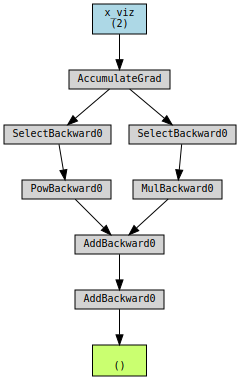

Computation graph for two-element x_viz displayed above.
Gradients for x_viz: dy/dx_viz[0] = 4.0, dy/dx_viz[1] = 2.0


In [ ]:
import torch
from torchviz import make_dot # Ensure make_dot is imported
import graphviz # Good practice to import explicitly if using display

# Using a tensor with two elements for x_viz
x_viz = torch.tensor([2.0, 3.0], requires_grad=True)
# Define y_viz as a function of both elements of x_viz
# Let y_viz = x_viz[0]^2 + 2*x_viz[1] + 1
# dy/dx_viz[0] = 2*x_viz[0] = 2*2.0 = 4.0
# dy/dx_viz[1] = 2 = 2.0
y_viz = x_viz[0]**2 + 2*x_viz[1] + 1
print(f"\nFor x_viz = {x_viz.tolist()}, y_viz = {y_viz.item()}")

# Generate the computation graph
graph = make_dot(y_viz, params={'x_viz': x_viz}) # Pass x_viz with a descriptive name

display(graph)
print("Computation graph for two-element x_viz displayed above.")


# If you want to see the gradients, call backward() first
if x_viz.grad is not None:
    x_viz.grad.zero_()
y_viz.backward() # Compute gradients to inspect them
print(f"Gradients for x_viz: dy/dx_viz[0] = {x_viz.grad[0]}, dy/dx_viz[1] = {x_viz.grad[1]}")

### 4.2 Visualizing a Function to Optimize (3D Plot)


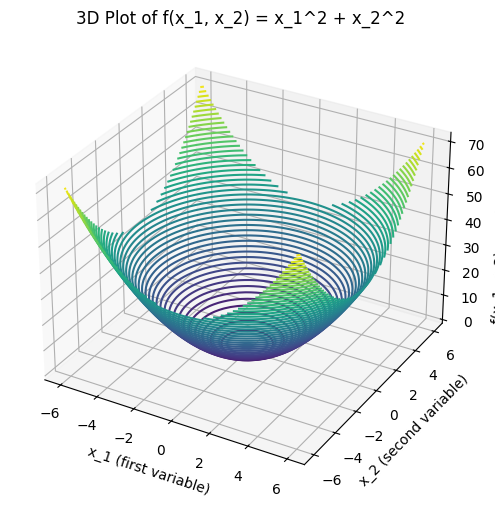

In [ ]:
def func_to_plot(x_coords, y_coords):
    return x_coords**2 + y_coords**2

x_range_plot = np.linspace(-6, 6, 50) # Define range for the first variable
y_range_plot = np.linspace(-6, 6, 50) # Define range for the second variable

X_mesh, Y_mesh = np.meshgrid(x_range_plot, y_range_plot) # Create a 2D grid
Z_values = func_to_plot(X_mesh, Y_mesh)       # Compute z values

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot
ax.contour3D(X_mesh, Y_mesh, Z_values, 70, cmap='viridis') # Plot 3D contour
ax.set_xlabel('x_1 (first variable)')
ax.set_ylabel('x_2 (second variable)')
ax.set_zlabel('f(x_1, x_2) = x_1^2 + x_2^2')
ax.set_title('3D Plot of f(x_1, x_2) = x_1^2 + x_2^2')
plt.show()

## Step 5: Simulating a Learning Rule with .backward()


--- Simulating a Learning Rule to make 'weight_learn * 4' approach 10.0 ---
Initial weight: 2.0000, Target weight: 2.5
Learning Rate: 0.01, Iterations: 50
Iteration 1: Weight: 2.1600, Output: 8.0000, Grad: -16.0000, Loss: 4.0000
Iteration 10: Weight: 2.4894, Output: 9.9378, Grad: -0.4974, Loss: 0.0039
Iteration 20: Weight: 2.4998, Output: 9.9987, Grad: -0.0105, Loss: 0.0000
Iteration 30: Weight: 2.5000, Output: 10.0000, Grad: -0.0002, Loss: 0.0000
Iteration 40: Weight: 2.5000, Output: 10.0000, Grad: -0.0000, Loss: 0.0000
Iteration 50: Weight: 2.5000, Output: 10.0000, Grad: -0.0000, Loss: 0.0000

Final weight after 50 iterations: 2.5000
Final output (weight * 4): 10.0000
Target: 10.0, Optimal weight should be around: 2.5


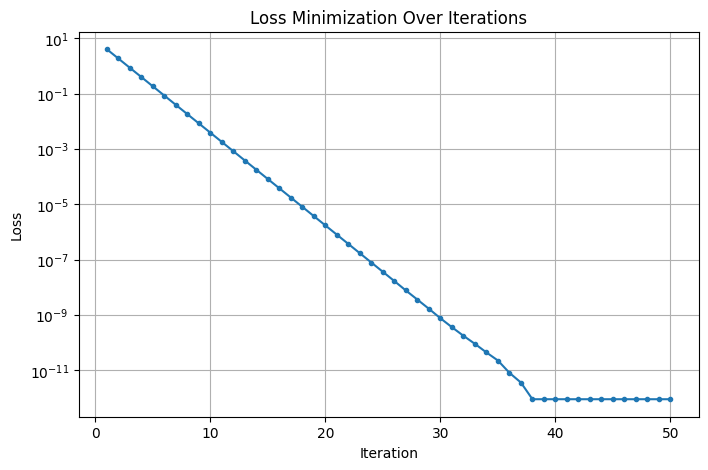

In [ ]:
# 1. Define an initial parameter (e.g., a weight) that we want to optimize.
#    It must have requires_grad=True to compute gradients for it.
weight_learn = torch.tensor(2.0, requires_grad=True)

# 2. Define a target value we want our model's output to reach.
target_learn = torch.tensor(10.0)

# 3. Define a learning rate, which controls the step size of our updates.
learning_rate_learn = 0.01 # Reduced learning rate for stability

# 4. Define the number of iterations for our learning simulation.
num_iterations_learn = 50 # Increased iterations for convergence

# The goal is to learn 'weight_learn' such that 'weight_learn * 4' is close to the target (10.0)
# The optimal weight should be 10.0 / 4 = 2.5
print(f"\n--- Simulating a Learning Rule to make 'weight_learn * 4' approach {target_learn.item()} ---")
print(f"Initial weight: {weight_learn.item():.4f}, Target weight: 2.5")
print(f"Learning Rate: {learning_rate_learn}, Iterations: {num_iterations_learn}")

# Store loss values for plotting
losses_learn = []

for i in range(num_iterations_learn):
    # a. Forward pass: Compute the model's output.
    #    Our simple model is: output = weight_learn * 4
    output_learn = weight_learn * 4

    # b. Calculate the loss: How far is our output from the target?
    #    We'll use Mean Squared Error: (output - target)^2
    loss_learn = (output_learn - target_learn)**2
    losses_learn.append(loss_learn.item()) # Store for plotting

    # c. Zero out previous gradients.
    #    It's crucial to do this before the backward pass in each iteration.
    if weight_learn.grad is not None:
        weight_learn.grad.zero_()

    # d. Backward pass: Compute the gradient of the loss with respect to 'weight_learn'.
    loss_learn.backward()
    # Now, weight_learn.grad contains d(loss_learn)/d(weight_learn)

    # e. Update the weight: Apply the learning rule (gradient descent).
    #    weight = weight - learning_rate * gradient
    #    This operation should NOT be tracked by autograd, so we use torch.no_grad().
    with torch.no_grad():
        weight_learn -= learning_rate_learn * weight_learn.grad
        # For our model output = w*4, loss = (w*4 - T)^2
        # d(loss)/dw = 2 * (w*4 - T) * 4 = 8 * (w*4 - T)
        # Example grad for iter 1: w=2.0, T=10.0. grad = 8 * (2.0*4 - 10.0) = 8 * (8.0 - 10.0) = 8 * (-2.0) = -16.0
        # New weight = 2.0 - 0.01 * (-16.0) = 2.0 + 0.16 = 2.16.
        # Output for new_w = 2.16*4 = 8.64. Loss = (8.64-10)^2 = (-1.36)^2 = 1.8496. (Previous loss was 4.0)
        # The loss has decreased, which is correct.


    if (i + 1) % 10 == 0 or i == 0: # Print every 10 iterations and the first one
        print(f"Iteration {i+1}: Weight: {weight_learn.item():.4f}, Output: {output_learn.item():.4f}, Grad: {weight_learn.grad.item():.4f}, Loss: {loss_learn.item():.4f}")


print(f"\nFinal weight after {num_iterations_learn} iterations: {weight_learn.item():.4f}")
final_output_learn = weight_learn * 4
print(f"Final output (weight * 4): {final_output_learn.item():.4f}")
print(f"Target: {target_learn.item()}, Optimal weight should be around: {target_learn.item()/4}")

# Plot the loss over iterations
plt.figure(figsize=(8,5))
plt.plot(range(1, num_iterations_learn + 1), losses_learn, marker='.')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Minimization Over Iterations")
plt.grid(True)
plt.yscale('log') # Use log scale for y-axis if loss changes over many orders of magnitude
plt.show()